# Exploratory Data Analysis for Assesing Pathogenicity Problem with the new data only for csq

This notebook was created  to showcase EDA for assesing pathogenicity problem. This notebook utilizes custom parsing implemented according to expert's specifications.

## Imports

In [1]:
from utils.EDA_utils import *
from utils.utils import get_dataset

In [2]:
df = get_dataset("data/", samples=["EE_015", "EE_050", "EE_069"], file_type="csq", option_csq="important")

In [3]:
df.head()

,Allele,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,Amino_acids,Codons,...,gnomADe_AF,gnomADg_AF,VAR_SYNONYMS,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,PHENOTYPES_exist,PUBMED_exist,ACMG_class
0,T,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,NaN,NaN,NaN,NaN,NaN,...,NaN,0.2196,NaN,NaN,NaN,NaN,NaN,0,0,Uncertain%40Significance
1,A,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,NaN,NaN,NaN,NaN,NaN,...,0.173,0.1916,NaN,NaN,NaN,NaN,NaN,0,0,Uncertain%40Significance
2,C,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,NaN,NaN,NaN,NaN,NaN,...,NaN,0.1511,NaN,NaN,NaN,NaN,NaN,0,0,Benign
3,A,CICP27,Transcript,ENST00000442987.3,processed_pseudogene,1/1,NaN,ENST00000442987.3:n.2105G>A,NaN,NaN,...,NaN,0.5479,NaN,NaN,NaN,NaN,NaN,0,0,Uncertain%40Significance
4,A,MIR6859-2,Transcript,ENST00000612080.1,miRNA,NaN,NaN,NaN,NaN,NaN,...,NaN,0.1333,NaN,NaN,NaN,NaN,NaN,0,0,Benign


In [4]:
df["ACMG_class"]

0         Uncertain%40Significance
1         Uncertain%40Significance
2                           Benign
3         Uncertain%40Significance
4                           Benign
                    ...           
444439    Uncertain%40Significance
444440    Uncertain%40Significance
444441    Uncertain%40Significance
444442    Uncertain%40Significance
444443    Uncertain%40Significance
Name: ACMG_class, Length: 444444, dtype: object

The target attribute is ACMG_class. The cardinality of this attribute is 5 with the number of occurences of each example being written below. As can be seen some mutations are much rarer than others, so techniques to fight against problems related to minority class will need to be employed.

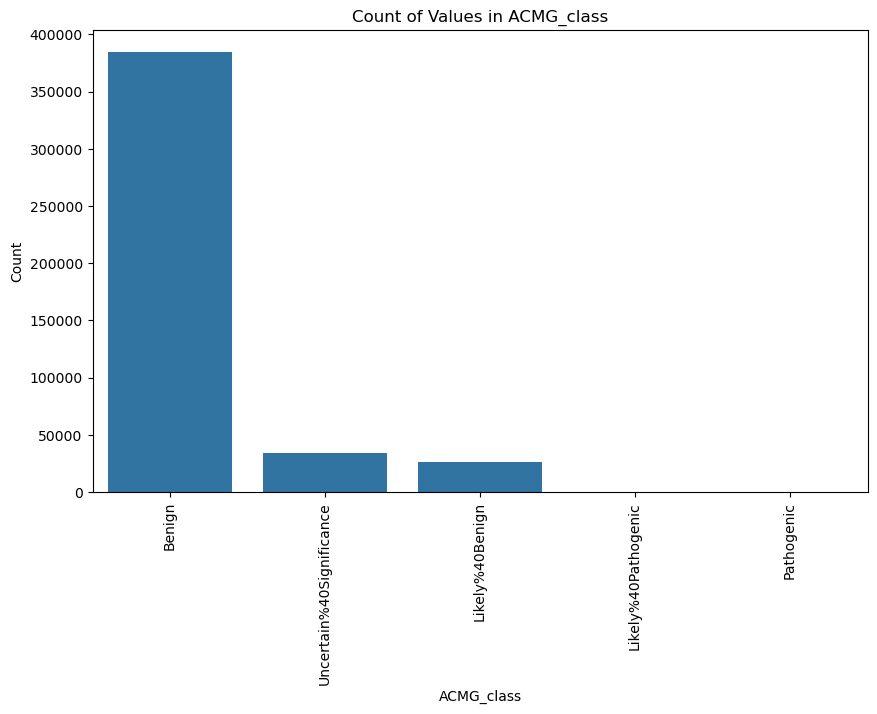

In [5]:
get_target_plot(df, "ACMG_class")

## Nans Section

Exploring the Nans present in the dataset - visualizations and summary

Counting Nans

In [6]:
nan_count_per_column = df.isna().sum()
nan_count_per_column[nan_count_per_column>0]

SYMBOL                 42674
Feature_type           12585
Feature                12585
BIOTYPE                12598
EXON                  302853
INTRON                253015
HGVSc                 111466
Amino_acids           393016
Codons                393014
Existing_variation     11545
DISTANCE              347708
STRAND                 14683
SYMBOL_SOURCE          42674
gnomADe_AF            324799
gnomADg_AF             16697
VAR_SYNONYMS          400750
MOTIF_NAME            444431
MOTIF_POS             444431
HIGH_INF_POS          444431
MOTIF_SCORE_CHANGE    444431
dtype: int64

Below Visualization is meant to provide information about the number of NaNs in chosen columns. Basically, we choose every column that has more than 100 000 Nans, meaning around 1/4th. If such a high numbers of Nans is present, me may consider dropping the column or doing something else with it. As such, We ended up visualizing all attributes for each number of Nans is greater than 100 000 to decide what to do with these columns farther. Some columns are all Nans or close to all Nans, as such dropping this data may be necessary.

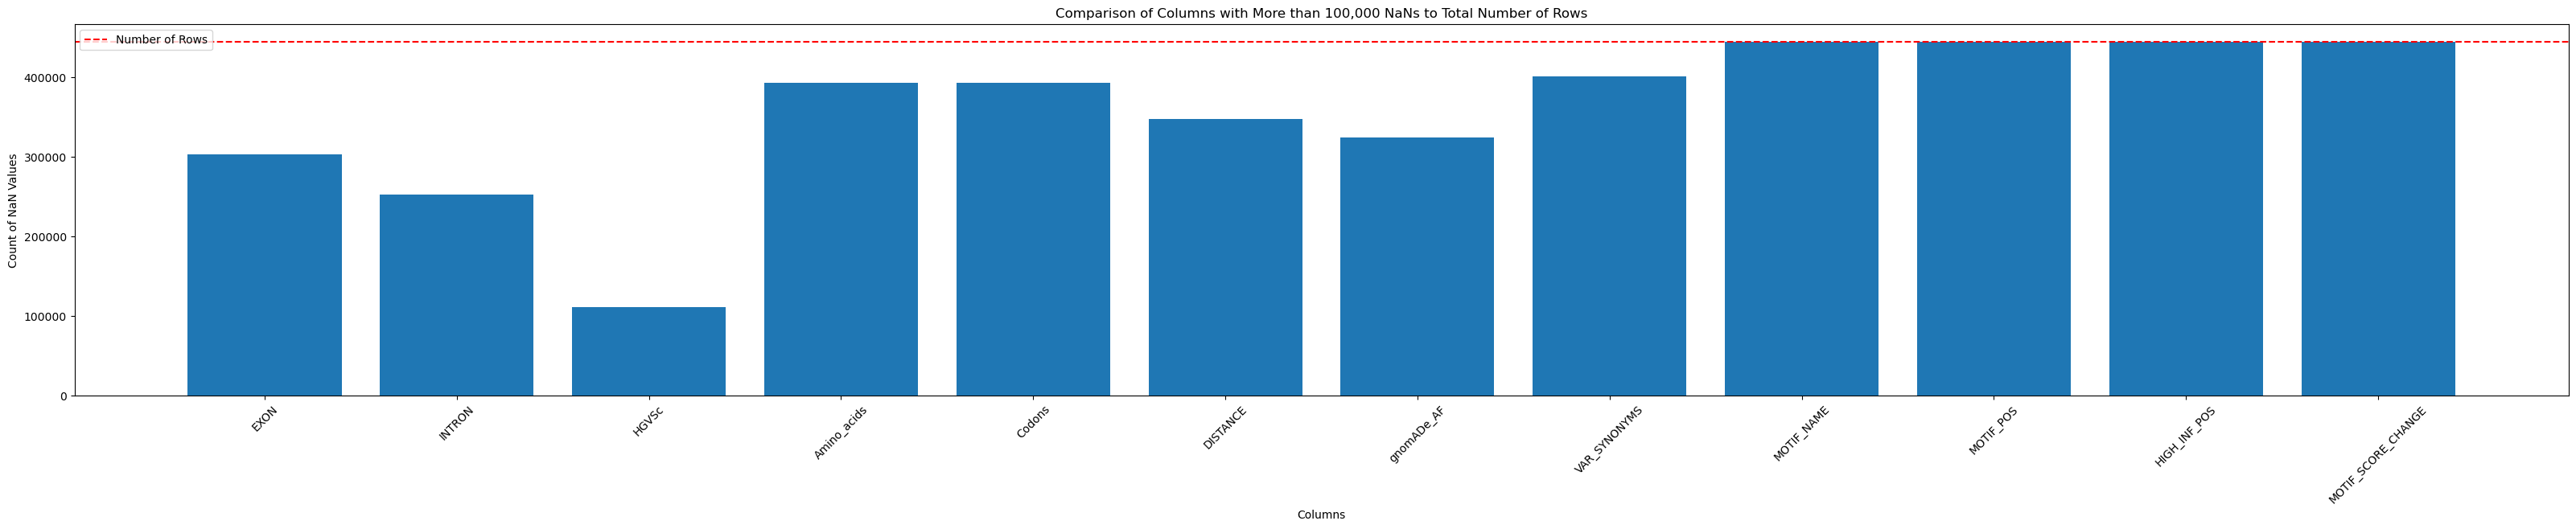

In [7]:
get_nans_plot(df, nan_threshold = 100000)

Summary of Columns

In [23]:
pd.set_option('display.max_rows', 118)
nans_df = inspect_columns(df)
nans_df

,unique,cardinality,with_null,null_count,null_pct,1st_row,random_row,last_row,dtype
Allele,False,2350,False,0,0.00,T,A,T,object
SYMBOL,False,23274,True,42674,9.60,DDX11L1,ZNF257,CTBP2P1,object
Feature_type,False,3,True,12585,2.83,Transcript,Transcript,Transcript,object
Feature,False,29670,True,12585,2.83,ENST00000450305.2,ENST00000435820.6,ENST00000431853.1,object
BIOTYPE,False,40,True,12598,2.83,transcribed_unprocessed_pseudogene,nonsense_mediated_decay,processed_pseudogene,object
EXON,False,2106,True,302853,68.14,NaN,5/5,NaN,object
INTRON,False,3345,True,253015,56.93,NaN,NaN,NaN,object
HGVSc,False,207583,True,111466,25.08,NaN,ENST00000435820.6:c.*358G>A,NaN,object
Amino_acids,False,793,True,393016,88.43,NaN,NaN,NaN,object
Codons,False,1429,True,393014,88.43,NaN,NaN,NaN,object


Showing Only Nan Columns

In [24]:
nans_df = nans_df[nans_df['null_count'] > 0]
nans_df = nans_df.drop(columns = ["unique", "last_row", "1st_row", "with_null", "random_row"])

nans_df

,cardinality,null_count,null_pct,dtype
SYMBOL,23274,42674,9.60,object
Feature_type,3,12585,2.83,object
Feature,29670,12585,2.83,object
BIOTYPE,40,12598,2.83,object
EXON,2106,302853,68.14,object
INTRON,3345,253015,56.93,object
HGVSc,207583,111466,25.08,object
Amino_acids,793,393016,88.43,object
Codons,1429,393014,88.43,object
Existing_variation,268960,11545,2.60,object


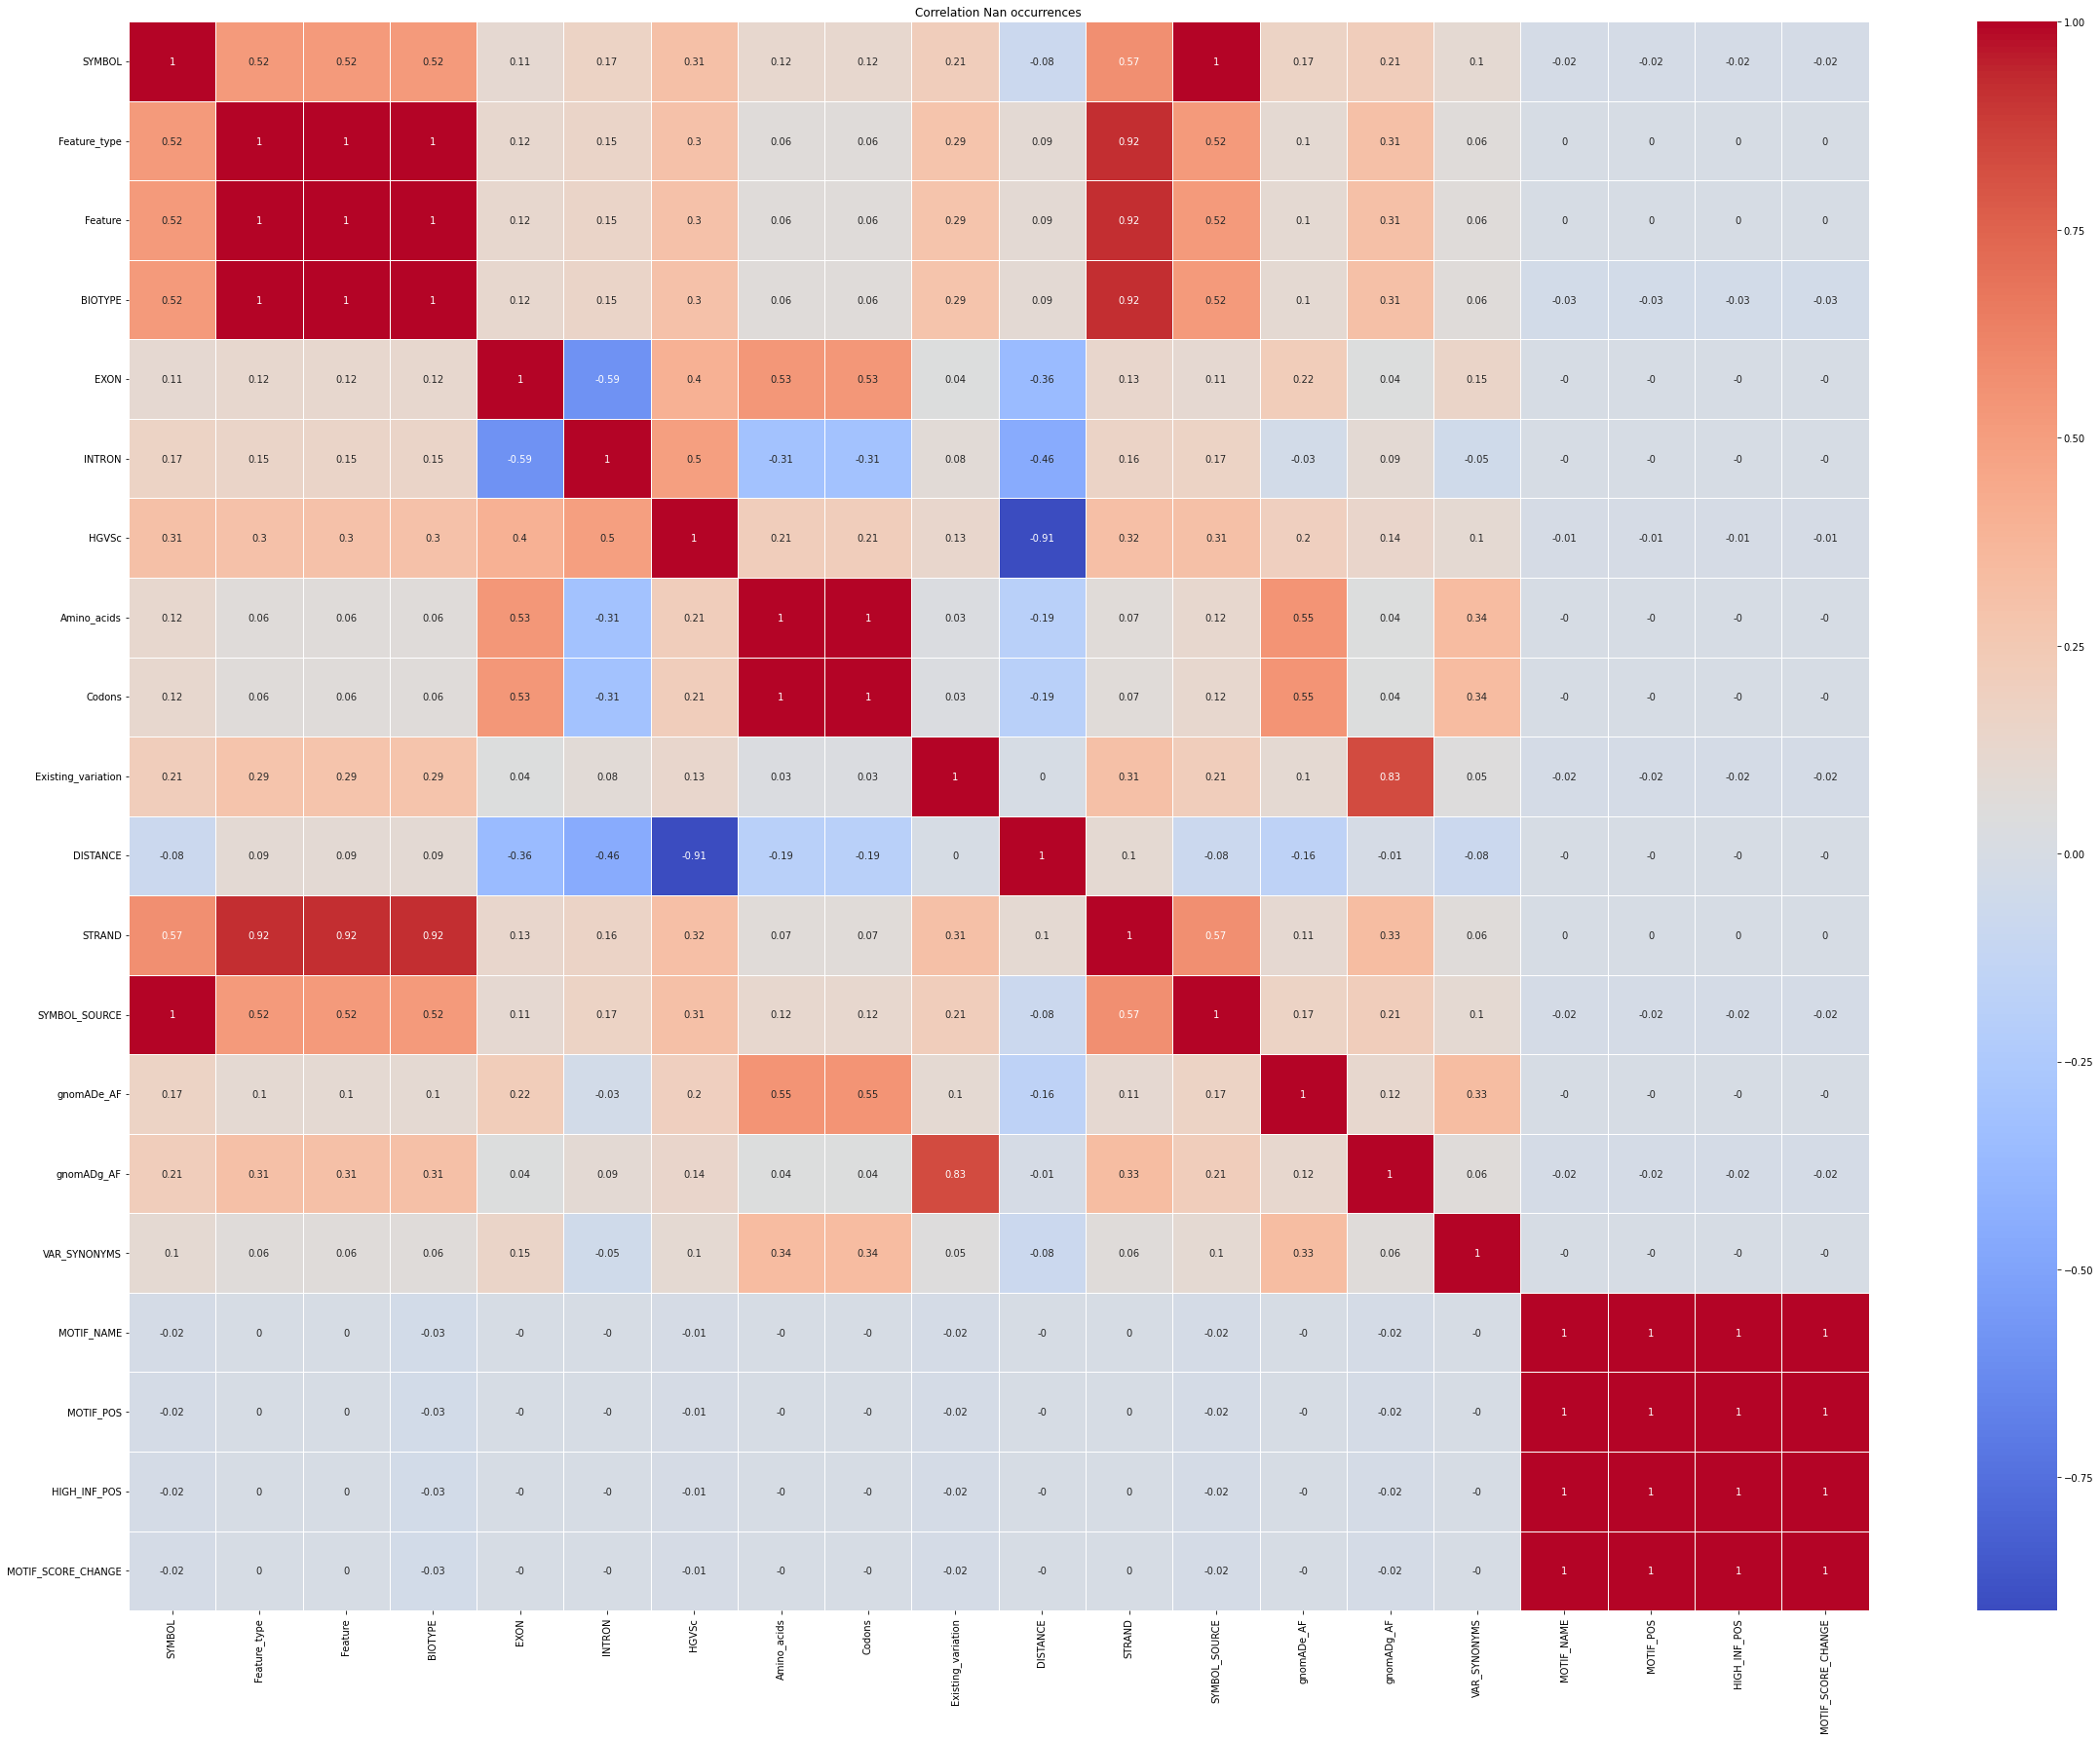

In [25]:
plot_corr_heatmap_nans(df)

Correlation of Nans with ACMG_class 

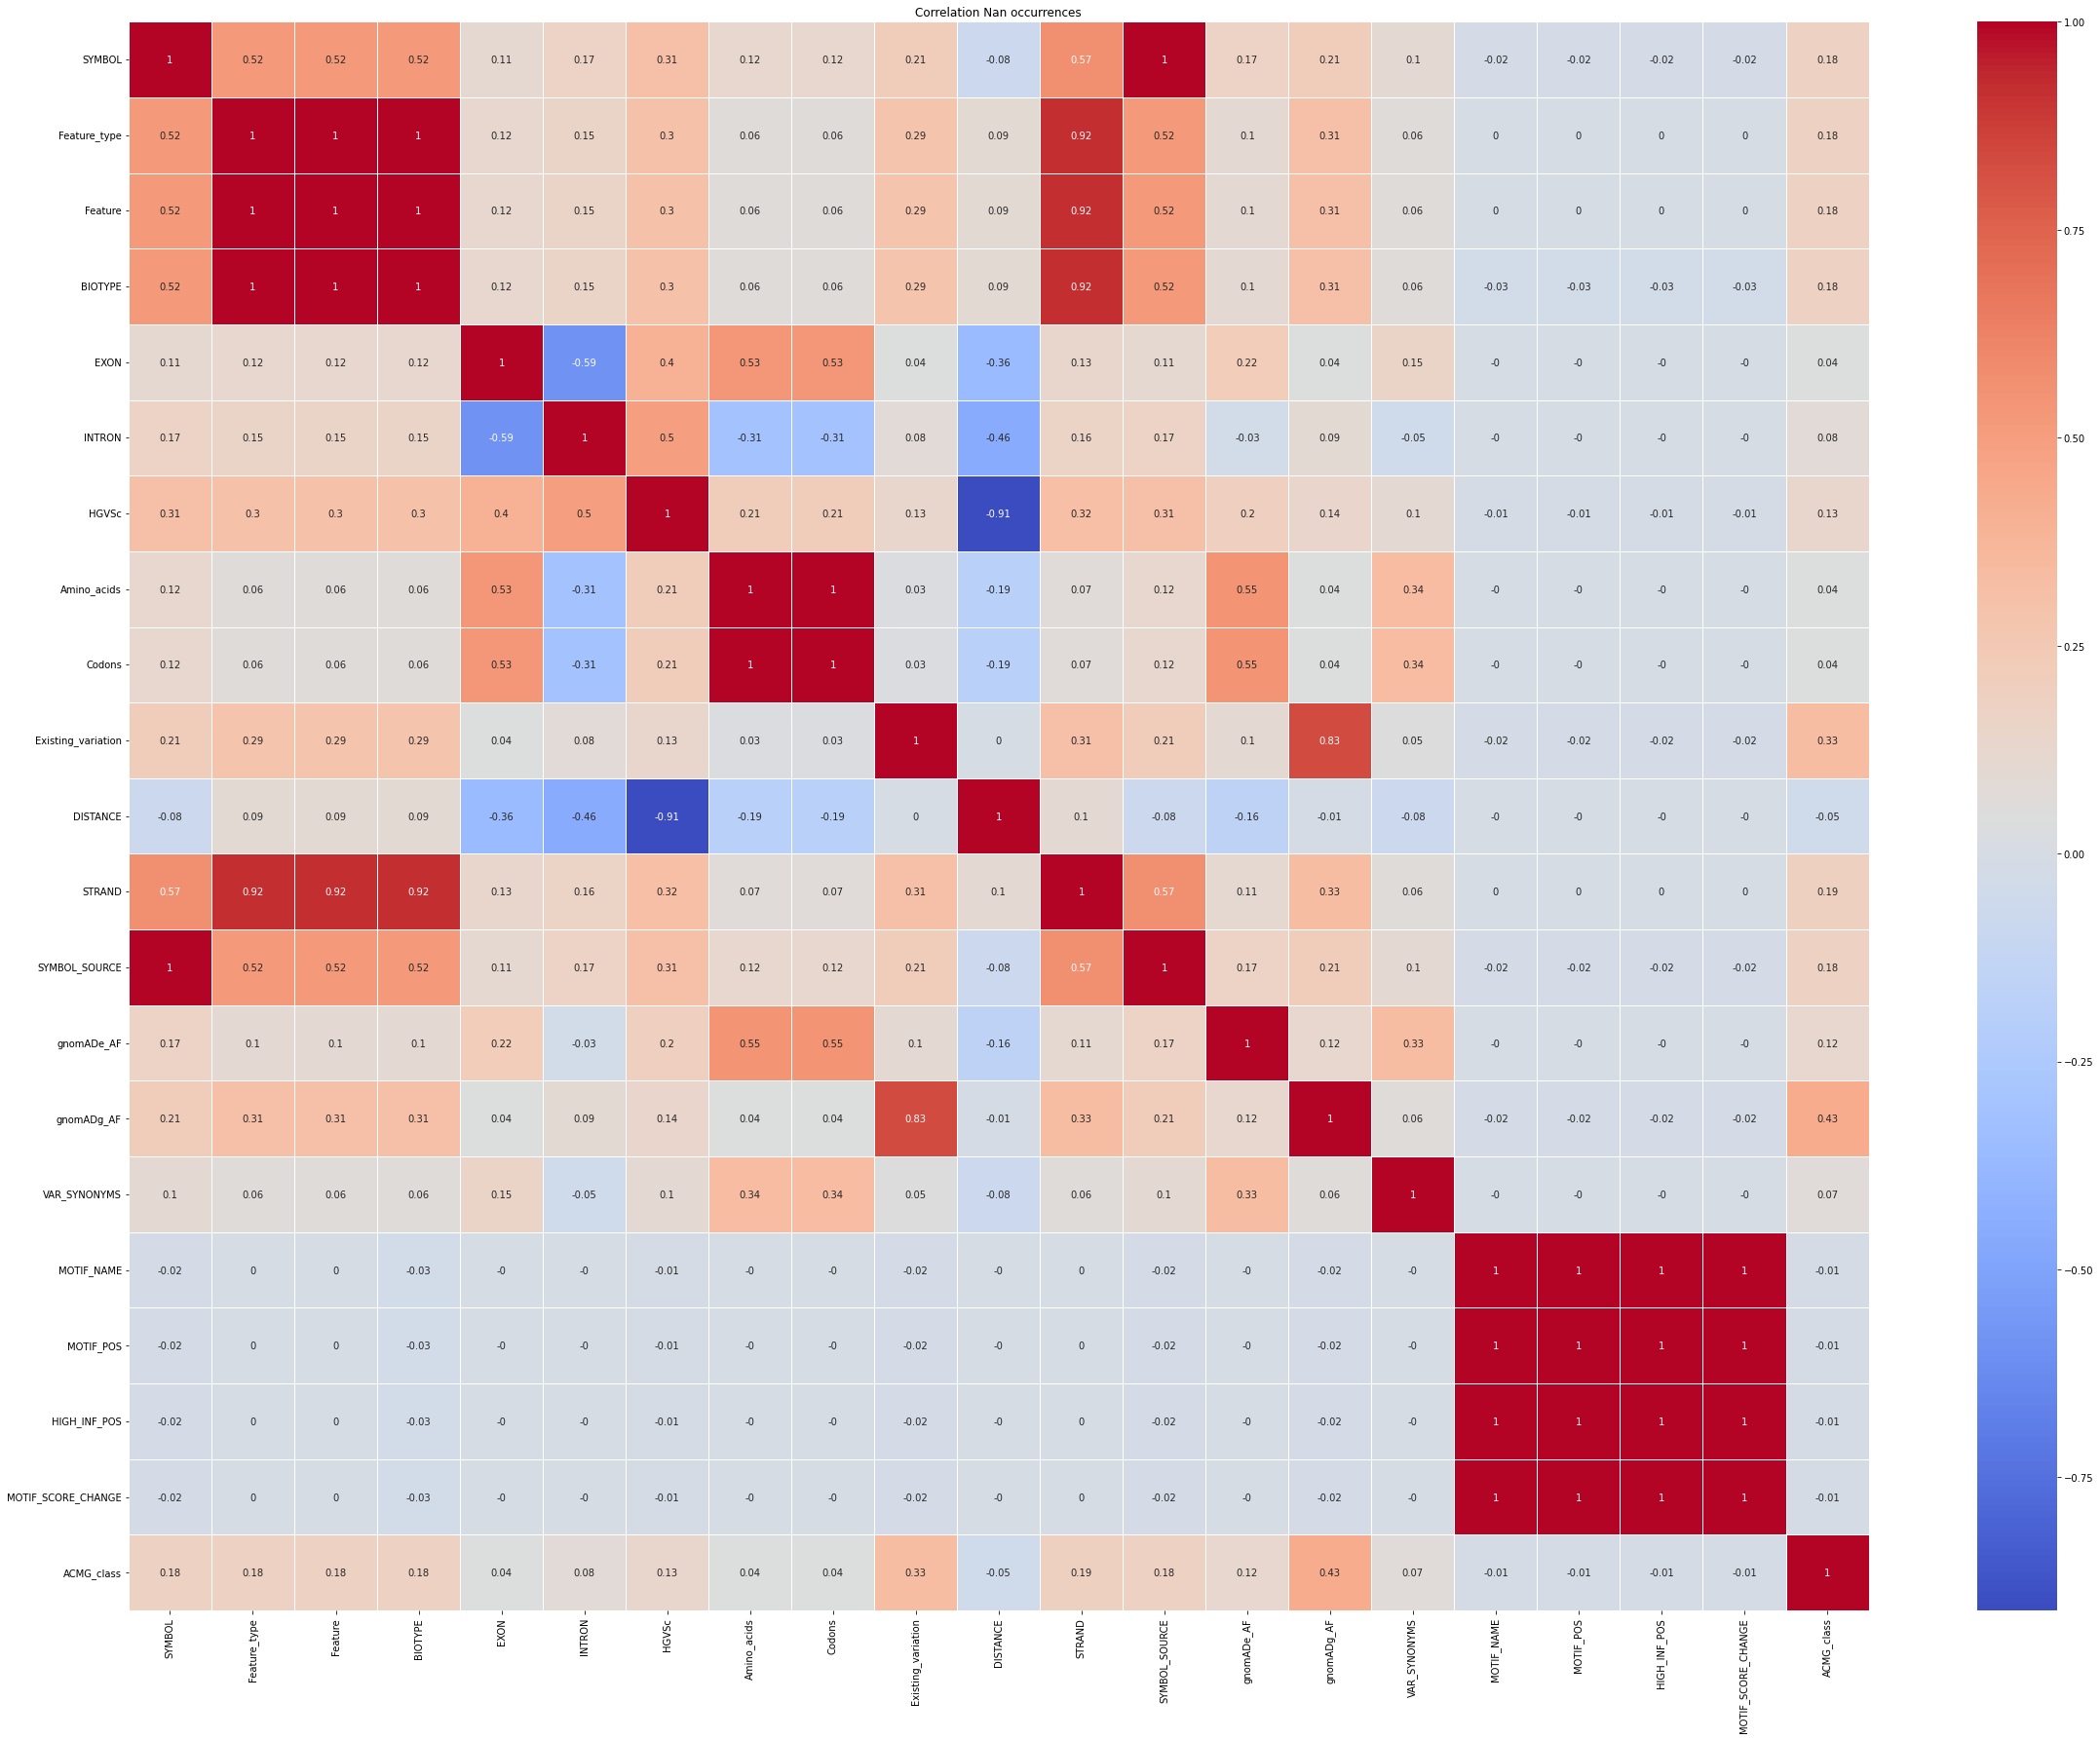

In [26]:
plot_corr_heatmap_nans_target(df, target="ACMG_class")

Highest Correlations of Nans to ACMG_class

In [27]:
get_nan_corr_treshold(df, target="ACMG_class", correlation_threshold = 0.15)

Index(['SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'Existing_variation',
       'STRAND', 'SYMBOL_SOURCE', 'gnomADg_AF', 'ACMG_class'],
      dtype='object')

## Datatype Visualizations

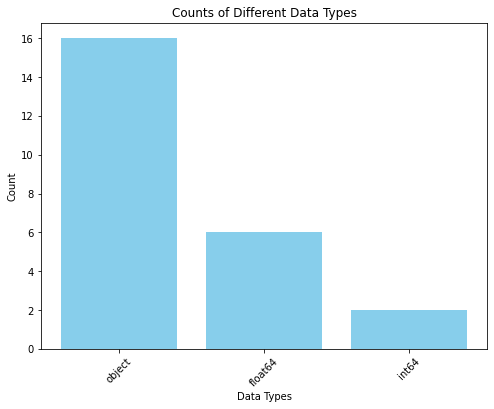

In [28]:
plot_dtypes(df)

## Proposed Preprocessing

This section includes a function performing the preprocessing steps. This function should be copied and pasted into the utils section as well for the sake of simplicity and re-usibility in the model section.

### Showing different proposed preprocessing schemes below:

In [29]:
preprocessed_df1 = preprocess(df)
preprocessed_df1.head()

,Allele,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,Amino_acids,Codons,...,DISTANCE_is_nan,STRAND_is_nan,SYMBOL_SOURCE_is_nan,gnomADe_AF_is_nan,gnomADg_AF_is_nan,VAR_SYNONYMS_is_nan,MOTIF_NAME_is_nan,MOTIF_POS_is_nan,HIGH_INF_POS_is_nan,MOTIF_SCORE_CHANGE_is_nan
0,T,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,No Value,No Value,No Value,No Value,No Value,...,0,0,0,1,0,1,1,1,1,1
1,A,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,No Value,No Value,No Value,No Value,No Value,...,0,0,0,0,0,1,1,1,1,1
2,C,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,No Value,No Value,No Value,No Value,No Value,...,0,0,0,1,0,1,1,1,1,1
3,A,CICP27,Transcript,ENST00000442987.3,processed_pseudogene,1/1,No Value,ENST00000442987.3:n.2105G>A,No Value,No Value,...,1,0,0,1,0,1,1,1,1,1
4,A,MIR6859-2,Transcript,ENST00000612080.1,miRNA,No Value,No Value,No Value,No Value,No Value,...,0,0,0,1,0,1,1,1,1,1


In [30]:
preprocessed_df2 = preprocess(df, fill_median=True)
preprocessed_df2.head()

,Allele,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,Amino_acids,Codons,...,DISTANCE_is_nan,STRAND_is_nan,SYMBOL_SOURCE_is_nan,gnomADe_AF_is_nan,gnomADg_AF_is_nan,VAR_SYNONYMS_is_nan,MOTIF_NAME_is_nan,MOTIF_POS_is_nan,HIGH_INF_POS_is_nan,MOTIF_SCORE_CHANGE_is_nan
0,T,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,No Value,No Value,No Value,No Value,No Value,...,0,0,0,1,0,1,1,1,1,1
1,A,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,No Value,No Value,No Value,No Value,No Value,...,0,0,0,0,0,1,1,1,1,1
2,C,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,No Value,No Value,No Value,No Value,No Value,...,0,0,0,1,0,1,1,1,1,1
3,A,CICP27,Transcript,ENST00000442987.3,processed_pseudogene,1/1,No Value,ENST00000442987.3:n.2105G>A,No Value,No Value,...,1,0,0,1,0,1,1,1,1,1
4,A,MIR6859-2,Transcript,ENST00000612080.1,miRNA,No Value,No Value,No Value,No Value,No Value,...,0,0,0,1,0,1,1,1,1,1


In [31]:
preprocessed_df3 = preprocess(df, one_hot_nans = False)
preprocessed_df3.head()

,Allele,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,Amino_acids,Codons,...,gnomADe_AF,gnomADg_AF,VAR_SYNONYMS,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,PHENOTYPES_exist,PUBMED_exist,ACMG_class
0,T,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,No Value,No Value,No Value,No Value,No Value,...,-1.000,0.2196,No Value,No Value,0.0,No Value,-1.071,0,0,Uncertain%40Significance
1,A,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,No Value,No Value,No Value,No Value,No Value,...,0.173,0.1916,No Value,No Value,0.0,No Value,-1.071,0,0,Uncertain%40Significance
2,C,DDX11L1,Transcript,ENST00000450305.2,transcribed_unprocessed_pseudogene,No Value,No Value,No Value,No Value,No Value,...,-1.000,0.1511,No Value,No Value,0.0,No Value,-1.071,0,0,Benign
3,A,CICP27,Transcript,ENST00000442987.3,processed_pseudogene,1/1,No Value,ENST00000442987.3:n.2105G>A,No Value,No Value,...,-1.000,0.5479,No Value,No Value,0.0,No Value,-1.071,0,0,Uncertain%40Significance
4,A,MIR6859-2,Transcript,ENST00000612080.1,miRNA,No Value,No Value,No Value,No Value,No Value,...,-1.000,0.1333,No Value,No Value,0.0,No Value,-1.071,0,0,Benign


## Encoding Objects to Categories

Used Functions and Example Use

In [32]:
custom_mapping = {
    'Benign': 0,
    'Likely%40Benign': 1,
    'Uncertain%40Significance': 2,
    'Likely%40Pathogenic': 3,
    'Pathogenic': 4
}

target_column = "ACMG_class"

In [33]:
temp_df,encoders,target_mapping = encode(preprocessed_df1, target_column, custom_mapping)
temp_df.head()

,Allele,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,Amino_acids,Codons,...,DISTANCE_is_nan,STRAND_is_nan,SYMBOL_SOURCE_is_nan,gnomADe_AF_is_nan,gnomADg_AF_is_nan,VAR_SYNONYMS_is_nan,MOTIF_NAME_is_nan,MOTIF_POS_is_nan,HIGH_INF_POS_is_nan,MOTIF_SCORE_CHANGE_is_nan
0,1787,4373,3,22392,38,2106,3345,205884,473,357,...,0,0,0,1,0,1,1,1,1,1
1,1,4373,3,22392,38,2106,3345,205884,473,357,...,0,0,0,0,0,1,1,1,1,1
2,529,4373,3,22392,38,2106,3345,205884,473,357,...,0,0,0,1,0,1,1,1,1,1
3,1,3298,3,21916,22,0,3345,178384,473,357,...,1,0,0,1,0,1,1,1,1,1
4,1,11805,3,27750,17,2106,3345,205884,473,357,...,0,0,0,1,0,1,1,1,1,1


In [34]:
get_mapping(encoders, "cosmicFathMMPrediction")

In [35]:
target_mapping

{'Benign': 0,
 'Likely%40Benign': 1,
 'Uncertain%40Significance': 2,
 'Likely%40Pathogenic': 3,
 'Pathogenic': 4}

Using on defined dataframes

In [36]:
custom_mapping = {
    'Benign': 0,
    'Likely%40Benign': 1,
    'Uncertain%40Significance': 2,
    'Likely%40Pathogenic': 3,
    'Pathogenic': 4
}

target_column = "ACMG_class"

In [37]:
encoded_df1, encoders1, target_mapping1 = encode(preprocessed_df1, target_column, custom_mapping)
encoded_df1.head()

,Allele,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,Amino_acids,Codons,...,DISTANCE_is_nan,STRAND_is_nan,SYMBOL_SOURCE_is_nan,gnomADe_AF_is_nan,gnomADg_AF_is_nan,VAR_SYNONYMS_is_nan,MOTIF_NAME_is_nan,MOTIF_POS_is_nan,HIGH_INF_POS_is_nan,MOTIF_SCORE_CHANGE_is_nan
0,1787,4373,3,22392,38,2106,3345,205884,473,357,...,0,0,0,1,0,1,1,1,1,1
1,1,4373,3,22392,38,2106,3345,205884,473,357,...,0,0,0,0,0,1,1,1,1,1
2,529,4373,3,22392,38,2106,3345,205884,473,357,...,0,0,0,1,0,1,1,1,1,1
3,1,3298,3,21916,22,0,3345,178384,473,357,...,1,0,0,1,0,1,1,1,1,1
4,1,11805,3,27750,17,2106,3345,205884,473,357,...,0,0,0,1,0,1,1,1,1,1


In [38]:
encoded_df2, encoders2, target_mapping2 = encode(preprocessed_df2, target_column, custom_mapping)
encoded_df2.head()

,Allele,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,Amino_acids,Codons,...,DISTANCE_is_nan,STRAND_is_nan,SYMBOL_SOURCE_is_nan,gnomADe_AF_is_nan,gnomADg_AF_is_nan,VAR_SYNONYMS_is_nan,MOTIF_NAME_is_nan,MOTIF_POS_is_nan,HIGH_INF_POS_is_nan,MOTIF_SCORE_CHANGE_is_nan
0,1787,4373,3,22392,38,2106,3345,205884,473,357,...,0,0,0,1,0,1,1,1,1,1
1,1,4373,3,22392,38,2106,3345,205884,473,357,...,0,0,0,0,0,1,1,1,1,1
2,529,4373,3,22392,38,2106,3345,205884,473,357,...,0,0,0,1,0,1,1,1,1,1
3,1,3298,3,21916,22,0,3345,178384,473,357,...,1,0,0,1,0,1,1,1,1,1
4,1,11805,3,27750,17,2106,3345,205884,473,357,...,0,0,0,1,0,1,1,1,1,1


In [39]:
encoded_df3, encoders3, target_mapping3 = encode(preprocessed_df3, target_column, custom_mapping)
encoded_df3.head()

,Allele,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,Amino_acids,Codons,...,gnomADe_AF,gnomADg_AF,VAR_SYNONYMS,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,PHENOTYPES_exist,PUBMED_exist,ACMG_class
0,1787,4373,3,22392,38,2106,3345,205884,473,357,...,-1.000,0.2196,21614,7,0.0,1,-1.071,0,0,2
1,1,4373,3,22392,38,2106,3345,205884,473,357,...,0.173,0.1916,21614,7,0.0,1,-1.071,0,0,2
2,529,4373,3,22392,38,2106,3345,205884,473,357,...,-1.000,0.1511,21614,7,0.0,1,-1.071,0,0,0
3,1,3298,3,21916,22,0,3345,178384,473,357,...,-1.000,0.5479,21614,7,0.0,1,-1.071,0,0,2
4,1,11805,3,27750,17,2106,3345,205884,473,357,...,-1.000,0.1333,21614,7,0.0,1,-1.071,0,0,0


## Data type counts

Dataframe 1

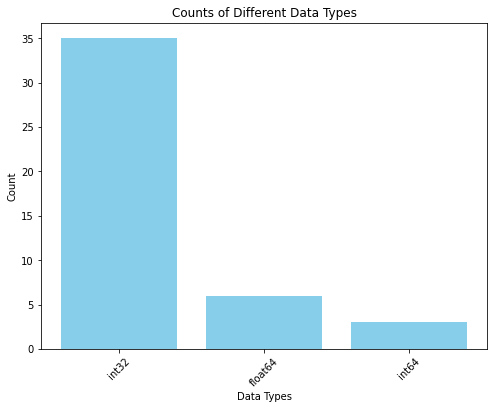

In [40]:
plot_dtypes(encoded_df1)

Dataframe 2

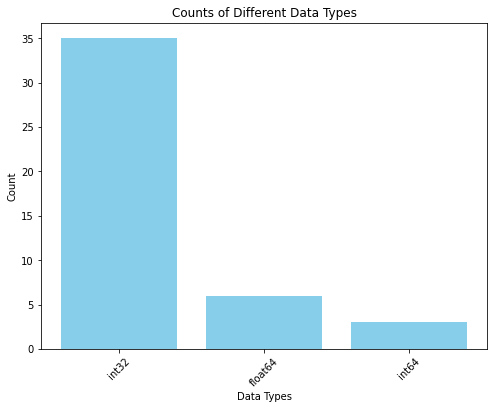

In [41]:
plot_dtypes(encoded_df2)

Dataframe 3

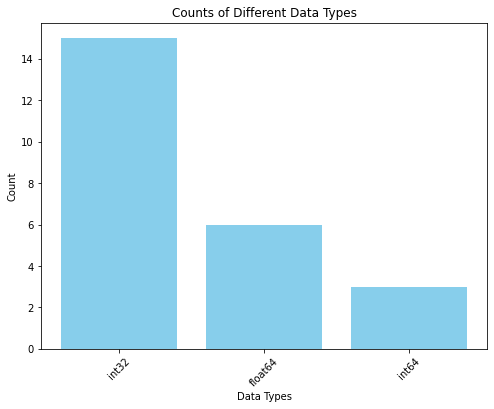

In [42]:
plot_dtypes(encoded_df3)

## Heatmaps of Correlations

Dataframe 1

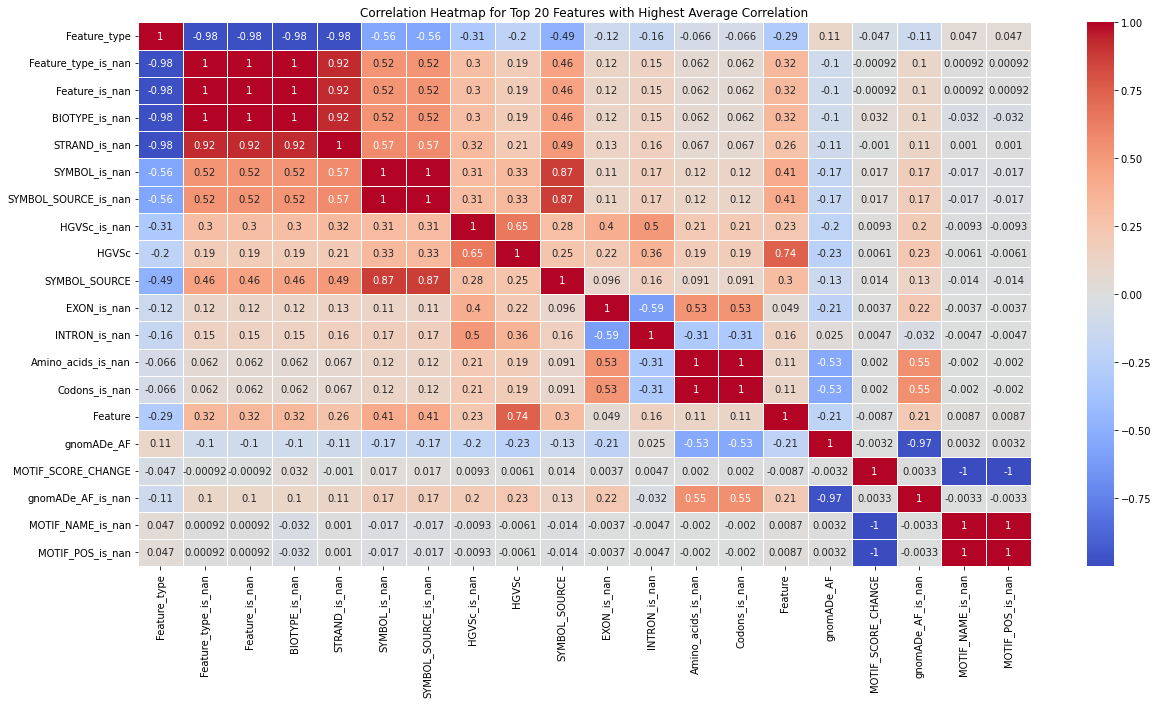

In [43]:
get_corr_heatmap(encoded_df1)

Datframe 2

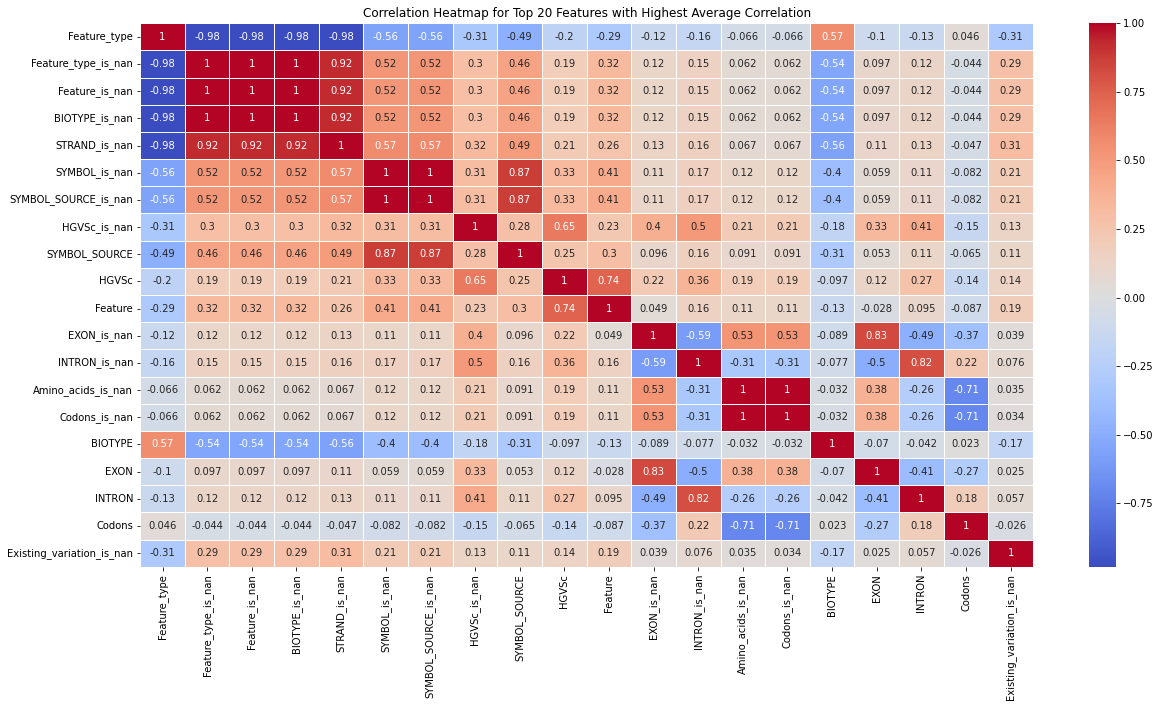

In [44]:
get_corr_heatmap(encoded_df2)

Dataframe 3

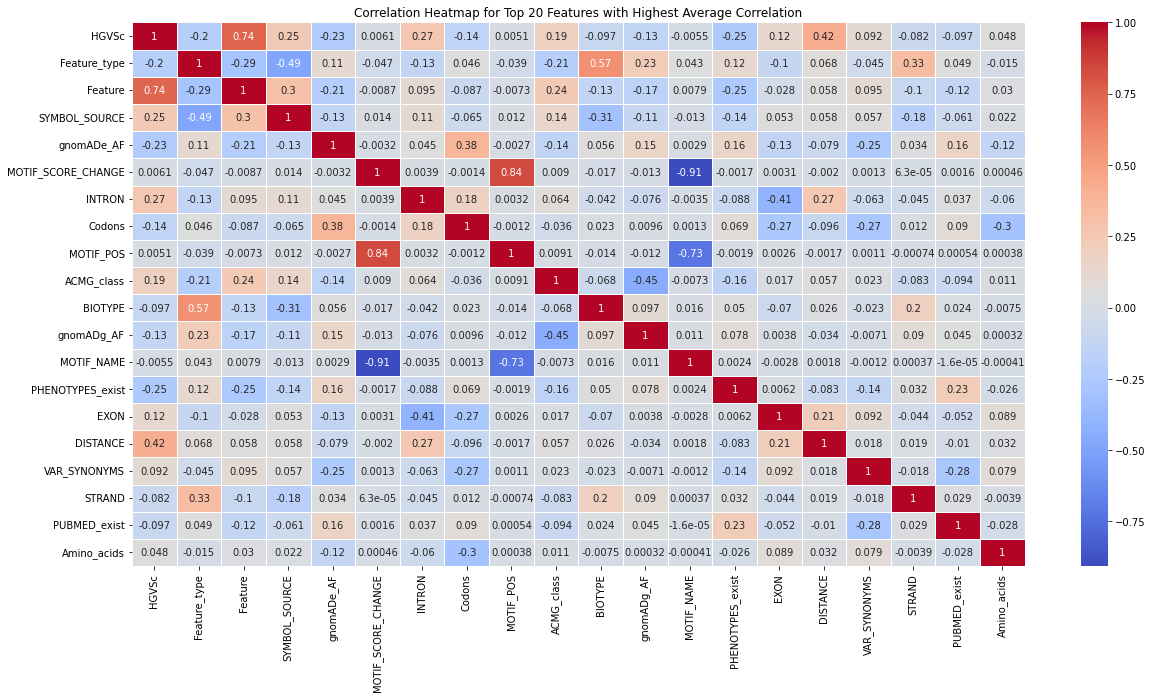

In [45]:
get_corr_heatmap(encoded_df3)

## Correlation and Mutual Information for ACMG_class

### Correlation

Dataframe 1

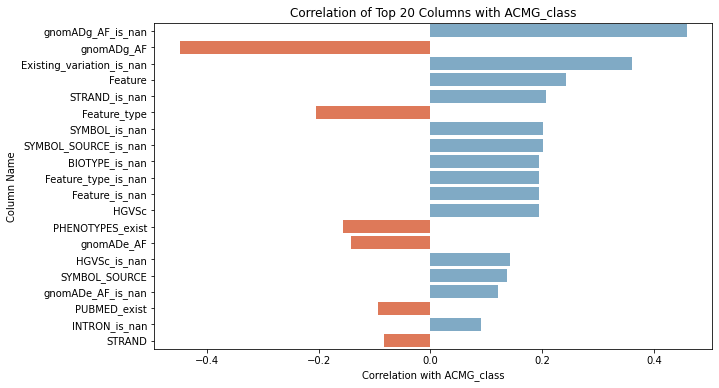

In [46]:
target_col = "ACMG_class"
get_corr_target(encoded_df1, target_col)

Dataframe 2

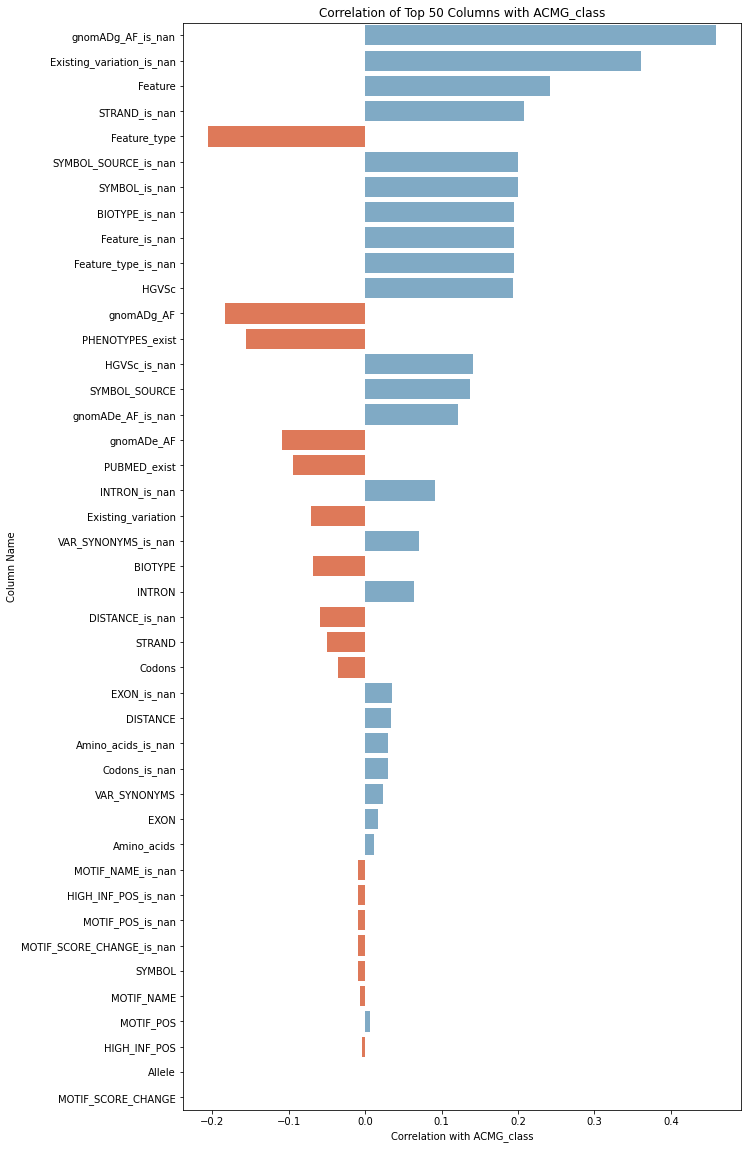

In [47]:
get_corr_target(encoded_df2, target_col, k=50, plot_size=(10, 20))

Dataframe 3

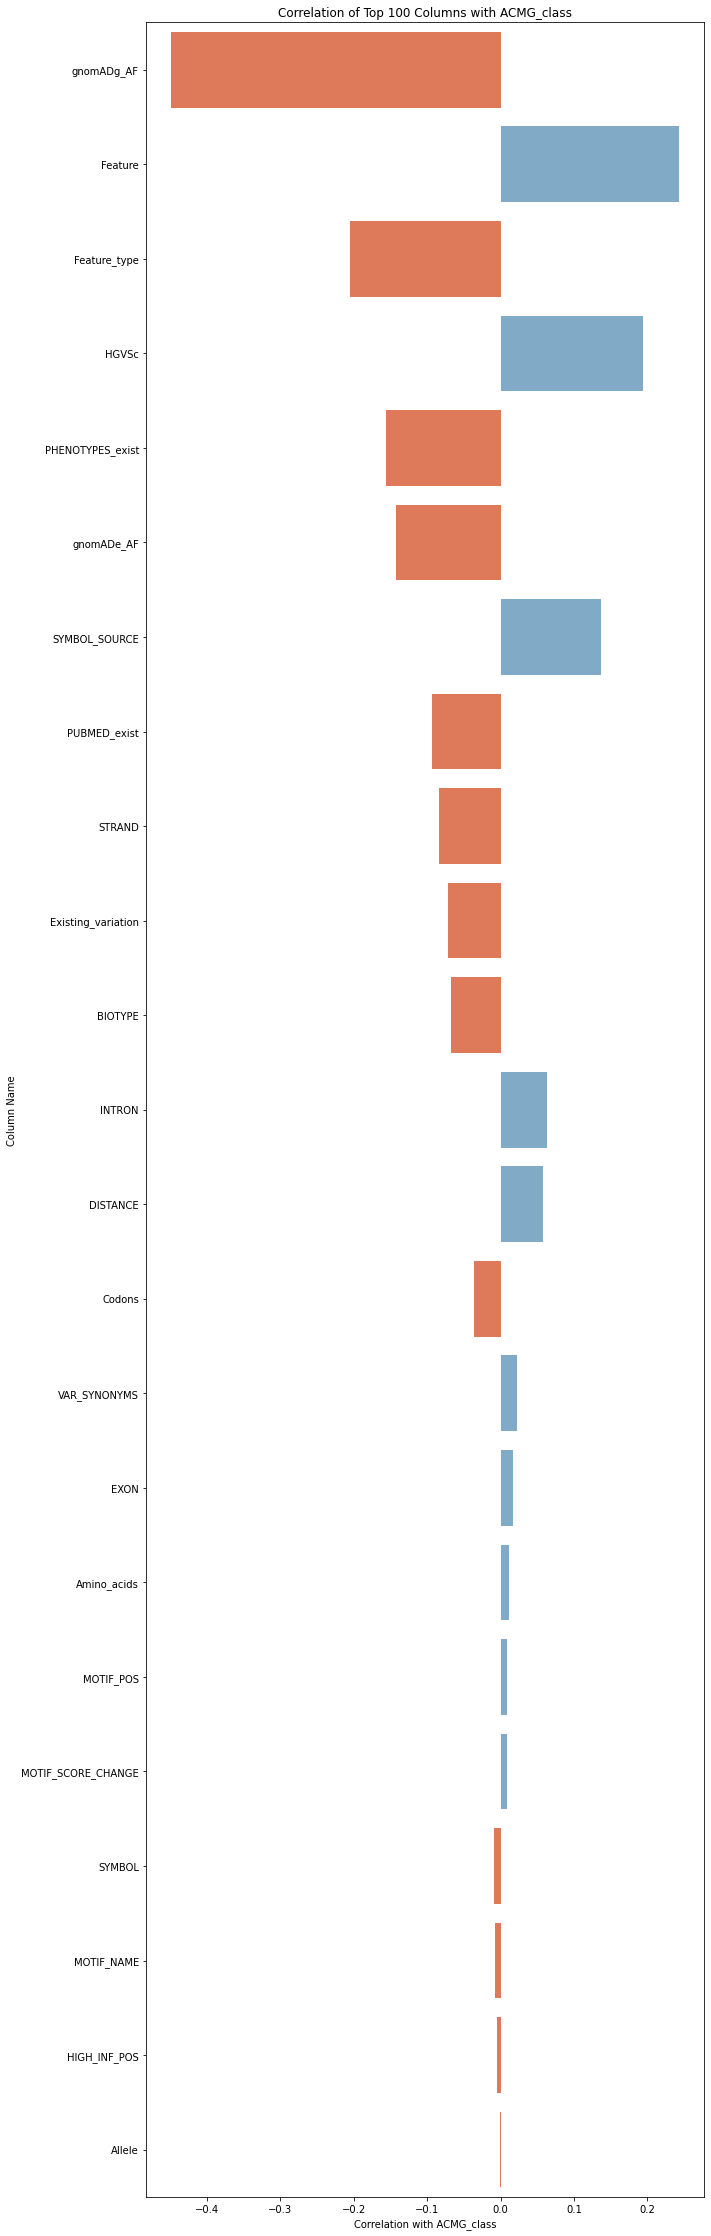

In [48]:
get_corr_target(encoded_df3, target_col, k=100, plot_size=(10, 40))

### Mutual Information

Dataframe 1

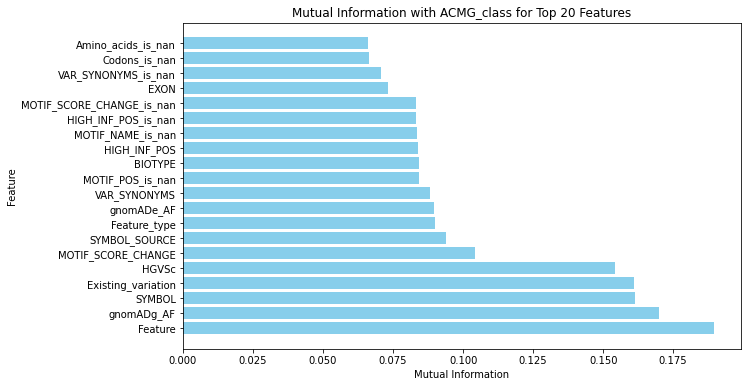

In [49]:
target_col = "ACMG_class"
get_mutual_info_plot(encoded_df1, target_col)

Datframe 2

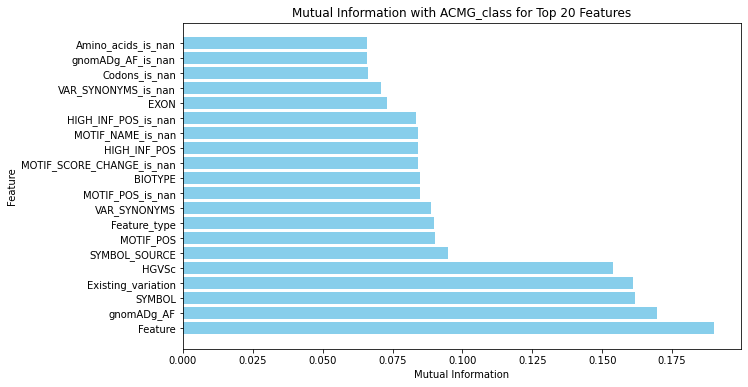

In [50]:
target_col = "ACMG_class"
get_mutual_info_plot(encoded_df2, target_col)

Datframe 3

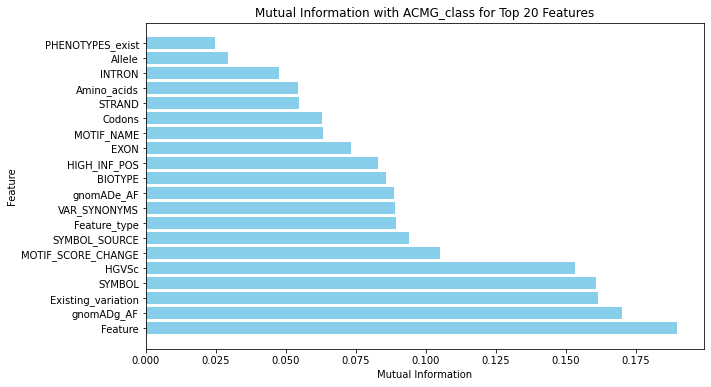

In [51]:
target_col = "ACMG_class"
get_mutual_info_plot(encoded_df3, target_col)